In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

network  = torch.nn.Linear(10, 10)
optim = torch.optim.SGD(network.parameters())

optim = torch.optim.AdamW(network.parameters())
for param_group in optim.param_groups:
    print(param_group)

{'params': [Parameter containing:
tensor([[ 0.0730,  0.0543,  0.2137, -0.2503, -0.0302,  0.2704,  0.0082, -0.2976,
          0.0192,  0.0157],
        [-0.2833,  0.0898,  0.1224, -0.2894, -0.2042,  0.2533,  0.0285,  0.1254,
          0.0499, -0.0970],
        [-0.3080,  0.1286,  0.1380, -0.1169, -0.2482,  0.2254, -0.0119, -0.2553,
         -0.0900,  0.2444],
        [-0.2852,  0.1919,  0.1412,  0.1926,  0.1254,  0.0980,  0.2877,  0.1458,
         -0.0713,  0.2053],
        [-0.0229, -0.1252,  0.0240,  0.0483, -0.1532, -0.0330,  0.1380,  0.3097,
         -0.0007, -0.0757],
        [ 0.1172,  0.1340,  0.1689, -0.2207, -0.1819,  0.0517, -0.1819,  0.0050,
          0.0644, -0.1515],
        [ 0.0129, -0.2636,  0.1657,  0.0526, -0.2934,  0.2088, -0.0642, -0.1507,
         -0.0859,  0.1781],
        [ 0.1700,  0.0294, -0.0498,  0.1340, -0.2002, -0.2961,  0.0094,  0.1977,
         -0.0536,  0.0129],
        [-0.0402,  0.2866,  0.1488,  0.1937, -0.1051, -0.0824,  0.0289, -0.0213,
         -0.2

/home/robin/miniconda3/envs/DLRK/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


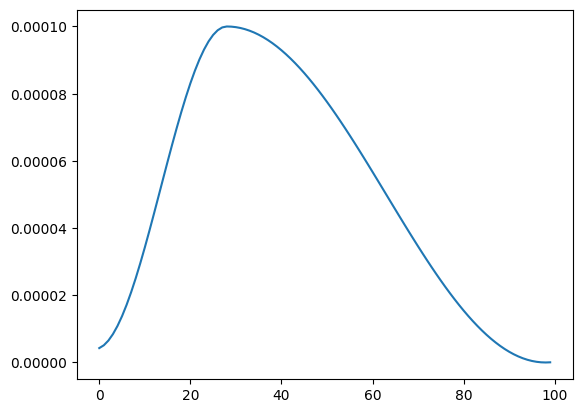

In [4]:
n_epochs = 100

scheduler = torch.optim.lr_scheduler.ConstantLR(optim, factor=1)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, max_lr=1e-4, total_steps=n_epochs)

learning_rate = np.empty(n_epochs)
for epoch in range(n_epochs):
    scheduler.step()
    learning_rate[epoch] = get_lr(optim)

plt.plot(learning_rate)